# Non-Linear Regression


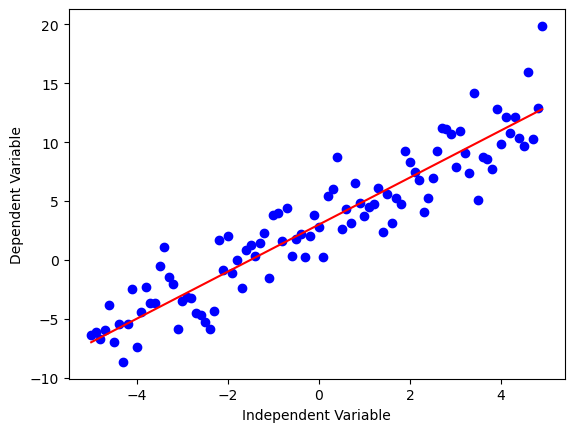

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#first of all we show a linear function like y=2x+3 and make some noise around it
x=np.arange(-5.0,5.0,0.1)
y=2*x+3
y_noise=2 *np.random.normal(size=x.size) #define normal noise (normal noise are near to line x=2x+3)
y_data=y+y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Making non-linear function

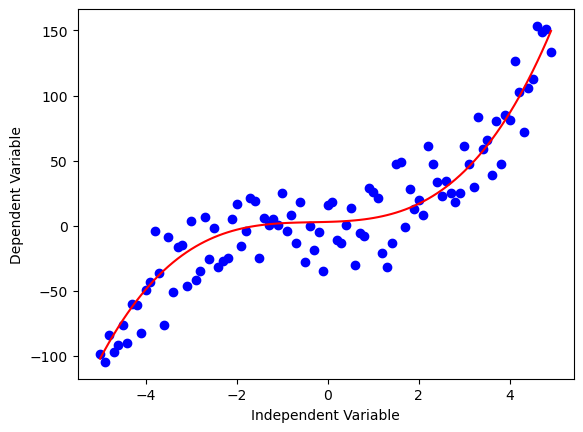

In [3]:
x=np.arange(-5,5,0.1)
y=1*(x**3)+1*(x**2)+1*x+3
y_noise=20*np.random.normal(size=x.size)
y_data=y+y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Quadratic



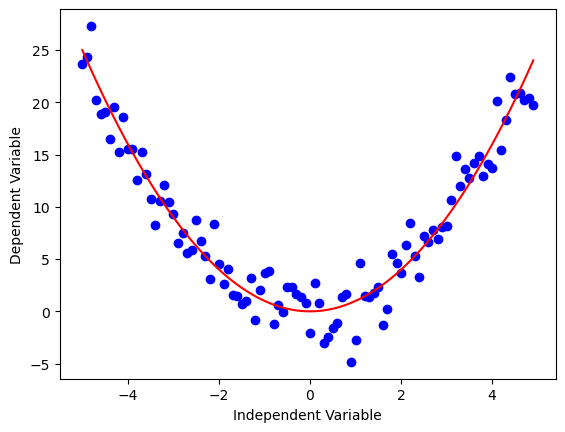

In [4]:
x=np.arange(-5,5,0.1)
y=np.power(x,2)
y_noise=2*np.random.normal(size=x.size)
y_data=y+y_noise
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Exponentional

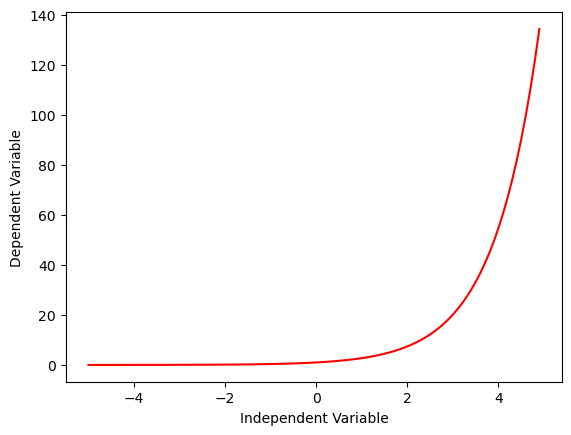

In [5]:
x=np.arange(-5,5,0.1)
y=np.exp(x)

plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Logaritmic

C:\Users\Atieh\AppData\Local\Temp\ipykernel_15364\3694227357.py:2: RuntimeWarning: invalid value encountered in log
  y=np.log(x)


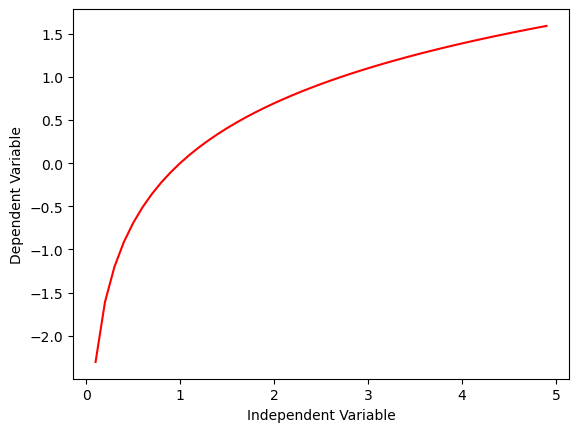

In [8]:

x=np.arange(-5,5,0.1)
y=np.log(x)

plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Sigmoidal/Logistic

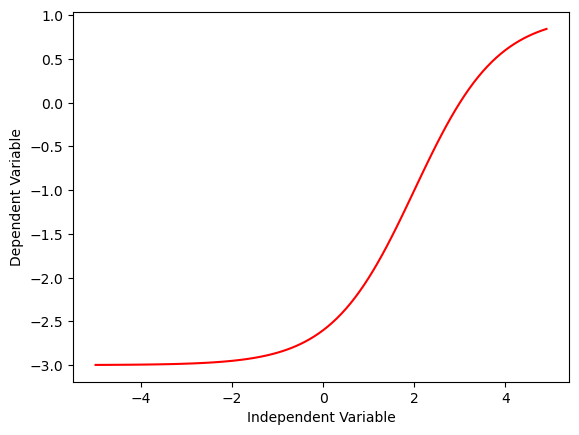

In [9]:
x=np.arange(-5,5,0.1)
y=1-4/(1+np.power(3,x-2)) #--> sigmoidal: a-b/(1+c**(X-d)) --> a=1, b=4, c=3, d=2

plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

## Non-Linear Regression Example

In [6]:
import pandas as pd
df=pd.read_csv("china_gdp.csv")
df.head()


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### plotting data

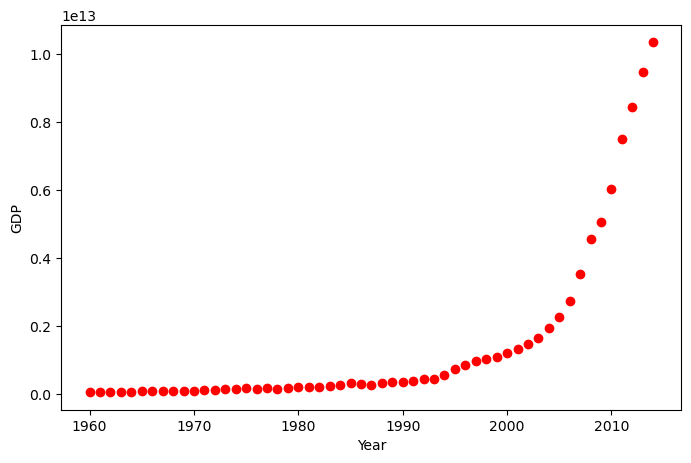

In [18]:
plt.figure(figsize=(8,5))
x_data, y_data=(df["Year"].values,df["Value"].values)
plt.plot(x_data, y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()


### choosing a model

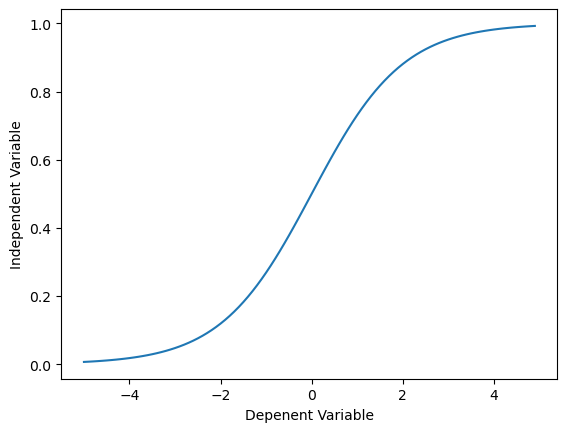

In [25]:
x=np.arange(-5,5,0.1)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.xlabel('Depenent Variable')
plt.ylabel('Independent Variable')
plt.show()

### Building a model

In [26]:
def sigmoid(x,beta1,beta2):
    y=1/(1+np.exp(-beta1*(x-beta2)))
    return y

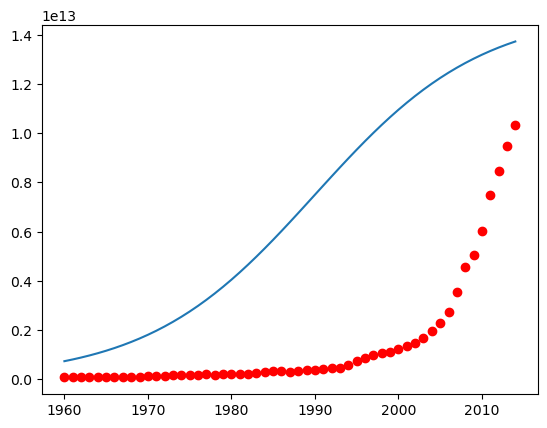

In [29]:
#if beta1=.1 and beta2=1990 then:
beta1=.1
beta2=1990

#ligistic function:
Y_pred= sigmoid(x_data,beta1,beta2)

#plot initial predition against datapoints
plt.plot(x_data ,Y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

In [31]:
#so it is hard to fit the curve to these datapoints, but my computer can do that :)
#lets normalize our data: --> x_data=[1969,1961,...,2014]--->normalize: max(x_data)=2014; xdata=[1969/2014,1961/2014,...,2014/2014] ---> 0<=xdata<=1
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)

In [33]:
from scipy.optimize import curve_fit
popt,pcov=curve_fit(sigmoid,xdata,ydata)
print("beta1=%f , beta2=%f" % (popt[0], popt[1]))

beta1=690.451712 , beta2=0.997207


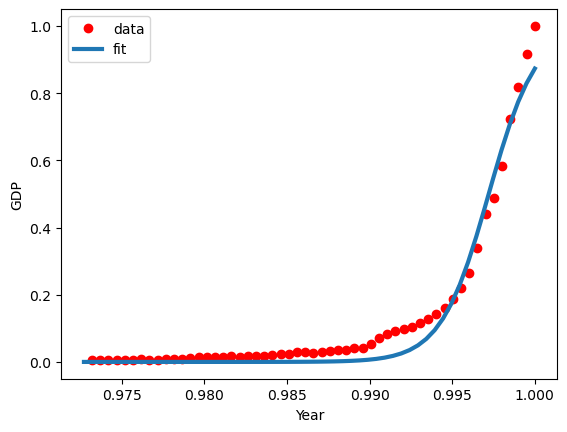

In [51]:
#now we plot our resulting regression model:
x=np.linspace(1960,2015,55)
x=x/max(x)
#print(x)
plt.plot(figsize=(8,5))
y=sigmoid(x,*popt) #-->sigmoid(x,popt[0],popt[1])
plt.plot(xdata,ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()